### K-Means for Color Compression

On this project, I'll try to compress the size of a picture by reducing its color range.

### Preparation

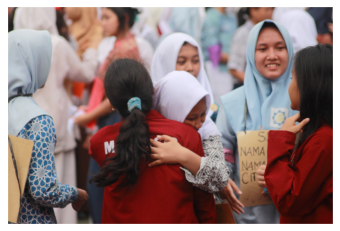

In [33]:
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

img = Image.open('gambar-asli.jpg')
img.load()
image = np.asarray(img)
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(img);

In [34]:
image.shape

(2848, 4272, 3)

One way we can view this set of pixels is as a cloud of points in a three-dimensional color space. We will reshape the data to [n_samples x n_features], and rescale the colors so that they lie between 0 and 1:

In [36]:
data = image / 255.0 # use 0...1 scale
data = data.reshape(2848 * 4272, 3)
data.shape

(12166656, 3)

We can visualize these pixels in this color space, using a subset of 10,000 pixels for efficiency:

In [37]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

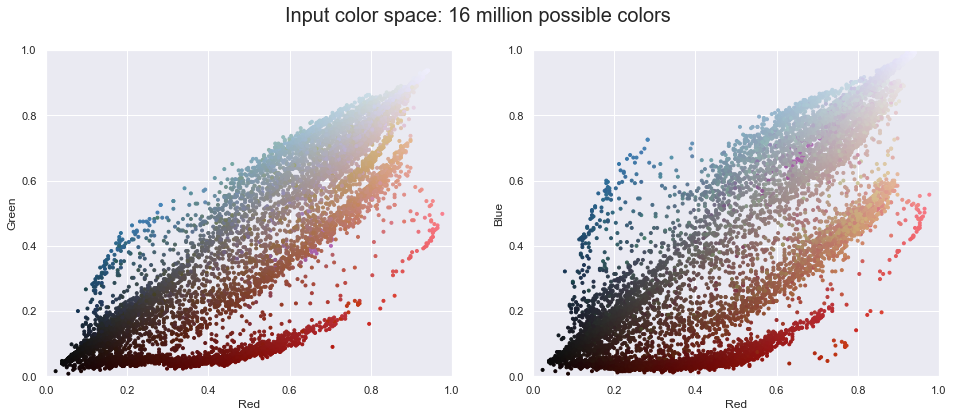

In [38]:
plot_pixels(data, title='Input color space: 16 million possible colors')


### Reducing Color Space

Now let's reduce these 16 million colors to just 8 colors, using a k-means clustering across the pixel space. Because we are dealing with a very large dataset, we will use the mini batch k-means, which operates on subsets of the data to compute the result much more quickly than the standard k-means algorithm:

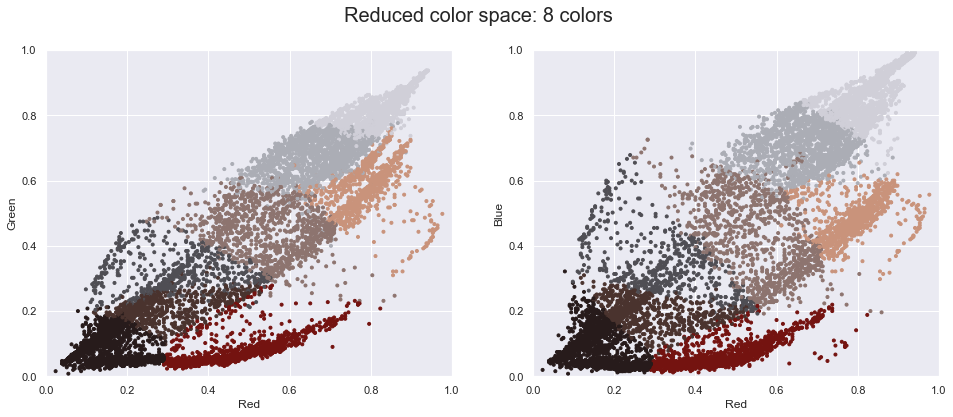

In [43]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(8)
kmeans.fit(data)

new_colors = np.asarray(kmeans.cluster_centers_[kmeans.predict(data)])

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 8 colors")

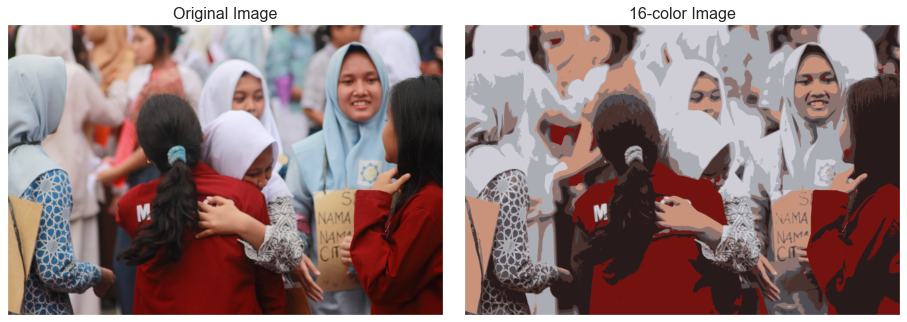

In [44]:
image_recolored = new_colors.reshape(image.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(image)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(image_recolored)
ax[1].set_title('16-color Image', size=16);

In [45]:
import imageio

imageio.imwrite('gambar-compress.jpg', image_recolored)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Then the compressed image already exported.
* The size of original photo is 6,63MB
* The size of compressed photo is 773KB